# Automated Expense Categorization - Notebook 01: Exploratory Data Analysis (EDA)

## 1. Setup
Load core libraries for data manipulation and visualization.

In [3]:
# Import NumPy for numerical operations (arrays, math functions, etc.)
import numpy as np

# Import pandas for data manipulation and analysis (DataFrames, CSV loading, etc.)
import pandas as pd

# Import Matplotlib's pyplot module for creating plots and charts
import matplotlib.pyplot as plt

# Import Seaborn for advanced and more visually appealing statistical plots
import seaborn as sns

# Quick confirmation message that the notebook is set up correctly
print("Notebook environment ready ✅")

Notebook environment ready ✅


# 2. Load Dataset
For this project, we are using the **Indian Personal Finance and Spending Habits Dataset**  
(Shriyash Jagtap, Kaggle).  

👉 Why this dataset works well for us:
- It contains a large number of financial transactions (~400k rows).
- Each record is labeled with a spending category, which supports supervised learning.
- The dataset is actively maintained and has permissive licensing.  

We selected this dataset after evaluating alternatives because it provides both **scale** (large sample size)  
and **relevance** (clear categories that align with expense categorization).


In [4]:
# Load the Indian Personal Finance and Spending Habits dataset
# The Kaggle download already extracted a single CSV called 'data.csv' into data/raw/

import pandas as pd
from pathlib import Path

# Define path relative to notebook location
csv_path = Path("../data/raw/data.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"Could not find {csv_path}. Check your data/raw/ folder.")

# Load dataset
df = pd.read_csv(csv_path)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20000, 27)


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


## 3. Quick Exploratory Data Analysis (EDA) and Reshaping

Before building models, we need to carefully explore the dataset and prepare it in a format suitable for **transaction categorization**.

### Goals of this step:
- **Inspect the dataset**: check size, column names, datatypes, and missing values.  
- **Identify expense-related columns**: find numeric fields that represent spending categories (e.g., Groceries, Rent, Insurance).  
- **Visualize distributions**: plot histograms for a few spending categories to understand ranges and variability.  
- **Reshape to a transaction format**: convert the dataset from **wide format** (many columns for each expense type) into a **long format** with rows.


| entity_id | category   | amount | demographics/features... |
|-----------|------------|--------|--------------------------|
| 1         | Groceries  | 250.0  | Income=50000, Age=35, ...|
| 1         | Rent       | 1200.0 | Income=50000, Age=35, ...|

This structure mimics real-world transactions and is more useful for supervised learning.  
- **Save processed data**: write the reshaped dataset to `data/processed/transactions_long.csv` for downstream modeling.

By the end of this step, we will have a **cleaned, long-form transaction dataset** ready for machine learning.

In [6]:
# -----------------------------------------------------------
# Step 3.1: Inspect the dataset
# -----------------------------------------------------------

# First, let's look at the basic structure of our dataset.
# This gives us the number of rows (observations) and columns (features).
print("Rows, Cols:", df.shape)

# Next, print out the list of all column names so we know what data we have.
# This helps us separate demographic columns (like Age, Income) from expense categories.
print("\nColumns:", list(df.columns))

# Display the first 5 rows of the dataset so we can get a quick preview
# of how the data looks (values, datatypes, etc.).
display(df.head(5))

Rows, Cols: (20000, 27)

Columns: ['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [7]:

# -----------------------------------------------------------
# Step 3.1b: Check for missing values
# -----------------------------------------------------------

# Missing values are important to catch early, since they may
# affect training later (e.g., models don’t like NaNs).
# Here, we calculate the number of missing entries per column.
na = df.isna().sum().sort_values(ascending=False)

# Display the top 20 columns with missing values (if any).
# Even if none are missing now, this is a good diagnostic check.
display(na.head(20))

Income                         0
Age                            0
Dependents                     0
Occupation                     0
City_Tier                      0
Rent                           0
Loan_Repayment                 0
Insurance                      0
Groceries                      0
Transport                      0
Eating_Out                     0
Entertainment                  0
Utilities                      0
Healthcare                     0
Education                      0
Miscellaneous                  0
Desired_Savings_Percentage     0
Desired_Savings                0
Disposable_Income              0
Potential_Savings_Groceries    0
dtype: int64

In [8]:
# -----------------------------------------------------------
# Step 3.2: Identify expense-related columns
# -----------------------------------------------------------

# Our dataset contains a mix of demographic features (e.g., Income, Age, Occupation)
# and numeric fields that represent different spending categories (e.g., Groceries, Rent).
# For transaction-level modeling, we care about the expense categories.

# First, let’s list all column names so we can manually decide which ones are "expenses."
all_columns = df.columns.tolist()
print("All columns:", all_columns)

# From inspection, the expense-related columns are:
expense_columns = [
    "Groceries",
    "Transport",
    "Eating_Out",
    "Entertainment",
    "Utilities",
    "Healthcare",
    "Education",
    "Miscellaneous"
]

print("\nExpense-related columns:", expense_columns)

# Quick summary of expenses: check descriptive statistics (mean, min, max, etc.)
# This helps us confirm that these columns actually contain monetary values.
display(df[expense_columns].describe().T)

All columns: ['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']

Expense-related columns: ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']


,count,mean,std,min,25%,50%,75%,max
Groceries,20000.0,5205.667493,5035.953689,154.078240,2165.426419,3741.091535,6470.892718,119816.898124
Transport,20000.0,2704.466685,2666.345648,81.228584,1124.578012,1933.845509,3360.597508,81861.503457
Eating_Out,20000.0,1461.856982,1481.660811,39.437523,581.011801,1029.109726,1807.075251,34406.100166
Entertainment,20000.0,1448.853658,1489.019270,45.421469,581.632906,1020.198376,1790.104082,38667.368308
Utilities,20000.0,2504.976953,2522.981880,75.429414,1017.670366,1766.474869,3103.723308,53725.442255
Healthcare,20000.0,1663.081794,1628.163024,53.500761,684.364440,1189.203827,2057.082277,36001.527365
Education,20000.0,2498.348422,3098.438166,0.000000,611.682170,1701.901075,3311.705122,81665.091857
Miscellaneous,20000.0,830.553181,845.019922,20.503223,323.626896,579.078393,1025.195018,15856.359401


In [ ]:
# -----------------------------------------------------------
# Step 3.3: Reshape wide → long to create a transaction-style table
# -----------------------------------------------------------

from pathlib import Path
import pandas as pd

# We’ll start from a copy so we don’t modify the original df accidentally.
wide_df = df.copy()

# Create a stable identifier for each record (person/household).
wide_df["entity_id"] = wide_df.index

# Columns to KEEP as "context" (demographics/features) alongside each transaction.
# Everything in `expense_columns` will be melted into rows as (category, amount).
context_cols = [c for c in wide_df.columns if c not in expense_columns]

# Melt the wide table:
# - Each expense column becomes a row with the category name and its amount.
# - The context columns remain as-is and are repeated per category.
long_df = wide_df.melt(
    id_vars=context_cols,           # columns we keep (entity_id, Income, Age, etc.)
    value_vars=expense_columns,     # columns to unpivot (Groceries, Transport, …)
    var_name="category",            # name for the new "which expense" column
    value_name="amount"             # name for the numeric value column
)

# Keep only rows that look like real transactions:
# - Drop NaNs
# - Keep strictly positive amounts (you can change to >= 0 if zeros are meaningful)
long_df = long_df[long_df["amount"].notna() & (long_df["amount"] > 0)].reset_index(drop=True)

print("Wide shape:", wide_df.shape)
print("Long shape:", long_df.shape)
display(long_df.head(10))

Wide shape: (20000, 28)
Long shape: (155939, 22)


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Desired_Savings_Percentage,Desired_Savings,...,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,entity_id,category,amount
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,13.890948,6200.537192,...,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,0,Groceries,6658.768341
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,7.160376,1923.176434,...,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,1,Groceries,2818.444460
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,13.997808,7050.360422,...,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,2,Groceries,6313.222081
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,16.455440,16694.965136,...,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,3,Groceries,14690.149363
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,7.533982,1874.099434,...,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,4,Groceries,3034.329665
5,24875.610267,57,4,Self_Employed,Tier_2,4975.122053,0.000000,1038.230996,5.944242,1478.666359,...,521.683848,135.925865,148.952326,86.567256,13.143683,33.961843,96.675925,5,Groceries,3250.067756
6,106119.692762,53,0,Self_Employed,Tier_2,21223.938552,0.000000,4360.202710,17.338502,18399.564592,...,912.958599,438.009790,541.702363,838.299989,111.857588,0.000000,409.453143,6,Groceries,12790.390693
7,55431.341508,40,1,Professional,Tier_2,11086.268302,8307.702220,1755.439820,11.972313,6636.413893,...,838.163700,466.179258,327.902059,353.411650,92.739538,116.121727,71.520963,7,Groceries,8194.482410
8,20606.733121,32,4,Retired,Tier_1,6182.019936,3562.488826,1018.589940,6.304984,362.917872,...,212.998059,85.489142,97.812946,252.344383,9.984250,59.957848,80.754353,8,Groceries,3066.867220
9,46304.790235,30,1,Student,Tier_2,9260.958047,0.000000,2130.254825,12.126401,5615.104745,...,380.272262,598.882904,188.311642,793.644470,34.873044,39.738841,203.146675,9,Groceries,5065.627032


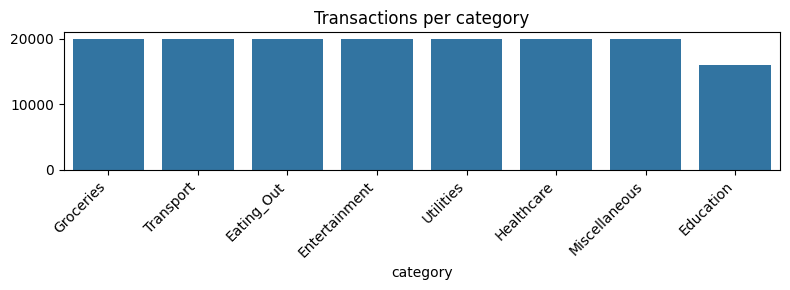

In [10]:
# Quick check: how many transactions per category?
import matplotlib.pyplot as plt
import seaborn as sns

counts = long_df["category"].value_counts()
plt.figure(figsize=(8,3))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("Transactions per category")
plt.tight_layout()
plt.show()

In [11]:
# -----------------------------------------------------------
# Step 3.4: Save processed long-form data
# -----------------------------------------------------------

out_dir = Path("../data/processed")
out_dir.mkdir(parents=True, exist_ok=True)

out_path = out_dir / "transactions_long.csv"
long_df.to_csv(out_path, index=False)

print(f"Saved long-form transactions to: {out_path.resolve()}")

Saved long-form transactions to: /workspaces/ari510-expense-categorization/data/processed/transactions_long.csv
